#### Denosing Image

1. Define The Problem
    * Observe the data
    * set the objective function
2. Hypothesise Solutions
3. Implement
4. Moniter Results(visualize is better)
5. repeat 1~4 (especially focus on bad cases)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


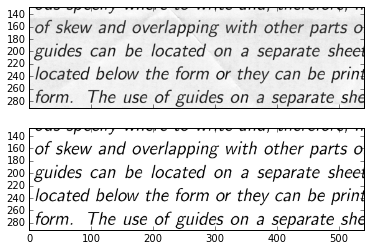

In [69]:
###########################################
# Define The Problem(Observer the data)
# 1. remove noise from images
# 2. images are three-dimensional surfaces
###########################################

from PIL import Image

def load_image(path):
    return np.asarray(Image.open(path))/255.0

def save(path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)


dirty_img = load_image('./train/101.png')
clean_img = load_image('./train_cleaned/101.png')
fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].imshow(dirty_img, cmap = cm.Greys_r)
ax[1].imshow(clean_img, cmap = cm.Greys_r)
plt.show()

In [35]:
###########################################
### set objective function
###########################################
import os
from sklearn.metrics import mean_squared_error

def measure():
    train_dir = './train'
    clean_dir = './train_cleaned'


    results = []
    for root, dirs, files in os.walk('./train'):
        for f in files:
            answer = []
            predict = []
            dirty_image = load_image(os.path.join(root, f))
            processed_image = denoise_image(dirty_image)
            clean_image = load_image(os.path.join(clean_dir, f))
            for (x,y), value in np.ndenumerate(processed_image):
                answer.append(value)
                predict.append(clean_image[x][y])
            results.append((f, mean_squared_error(answer, predict)**0.5))
            
    for r in sorted(results, key=lambda a:a[1], reverse=True)[:100]:
        print r[0], r[1]

    RMSE = sum([x[1] for x in results]) / len(results)

    return 'Whole RMSE:', RMSE

In [11]:
###########################################
# Hypothesise Solution: we hypothesised that
# the pixel brightnesses needed to be rescaled
###########################################

In [5]:
###########################################
# Implement: Linear Regression
###########################################

import os
import numpy as np
from sklearn.linear_model import LinearRegression
from util import *
from matplotlib.pyplot import plot

X = []
Y = []
def train_model():
    print 'training model...'
    train_dir = './train'
    train_cleaned_dir = './train_cleaned'

    for f in os.listdir(train_dir):
        dirty_image = load_image(os.path.join(train_dir, f))
        clean_image = load_image(os.path.join(train_cleaned_dir, f))
        for (x,y), value in np.ndenumerate(dirty_image):
            if value > 0.05 and value <= 0.95:
                X.append([value,])
                Y.append(clean_image[x][y])

    model.fit(X, Y)


model = LinearRegression()
train_model()

training model...


In [6]:
print model.coef_, model.intercept_
model.predict(0.8)

[ 1.1841349] -0.0150630457292


array([ 0.93224487])

In [7]:
def denoise_image(inp):
    out = inp.copy()
    for (x,y), value in np.ndenumerate(inp):
        out[x][y] = min(max(model.predict(value), 0), 1)

    return out

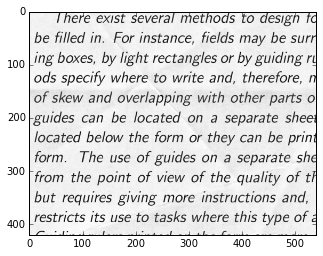

In [8]:
inp = load_image('./train/101.png')
pylab.imshow(inp, cmap = cm.Greys_r)

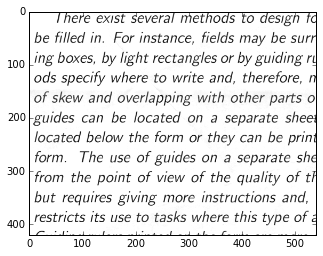

In [9]:
out = denoise_image(inp)
pylab.imshow(out, cmap = cm.Greys_r)

In [ ]:
'''Moniter Results'''
print 'Linear Regression RMSE:', measure()

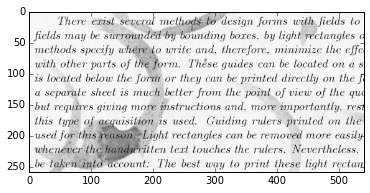

In [11]:
inp = load_image('./train/2.png')
pylab.imshow(inp, cmap = cm.Greys_r)

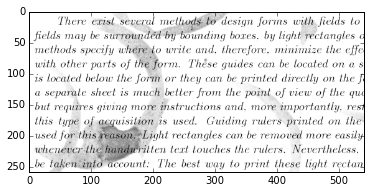

In [12]:
out = denoise_image(inp)
pylab.imshow(out, cmap = cm.Greys_r)

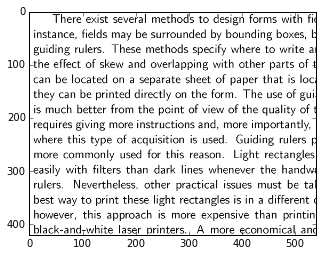

In [42]:
#######################
# Background Removal
### observe the data: the writing part should be darker than the dirty party
#######################

from scipy import signal

def denoise_image(inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)

    # compute 'foreground' mask as anything that is significantly darker than
    # the background
    mask = inp < bg - 0.1

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

out = denoise_image(inp)
pylab.imshow(out, cmap = cm.Greys_r)

In [36]:
print 'Background Removal RMSE:'
print measure()

Background Removal RMSE:
191.png 0.0715352141699
192.png 0.0702472354438
119.png 0.0690157153234
179.png 0.06826833453
120.png 0.0676843787591
180.png 0.0663497539803
47.png 0.0660206178944
216.png 0.0654864390898
215.png 0.0651356776352
35.png 0.0646031803446
107.png 0.064531187971
48.png 0.0639709743514
132.png 0.0638626650249
108.png 0.063860573308
71.png 0.0631420764046
24.png 0.0631220591392
36.png 0.0631027299898
203.png 0.0627426064839
23.png 0.0623189090166
204.png 0.0620241792695
12.png 0.0618780313456
72.png 0.061677038841
186.png 0.061573473659
11.png 0.0614579175134
59.png 0.0613604732719
168.png 0.0612695244367
185.png 0.0607489687259
131.png 0.0602285573497
167.png 0.060222001828
60.png 0.0601211099542
155.png 0.0600084425477
156.png 0.0600014623601
143.png 0.0599995920246
3.png 0.0594063841215
144.png 0.059067641971
15.png 0.0583754275564
174.png 0.0580530519879
173.png 0.0579445223469
113.png 0.0577389800068
96.png 0.0574997541611
114.png 0.0570914618471
95.png 0.057060

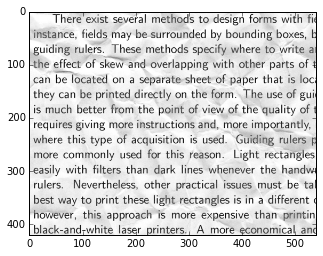

In [73]:
inp = load_image('./train/191.png')
pylab.imshow(inp, cmap = cm.Greys_r)

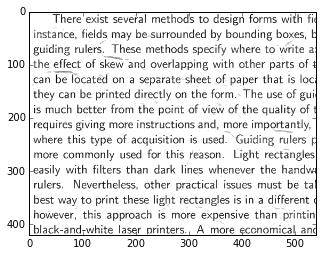

In [38]:
out = denoise_image(inp)
pylab.imshow(out, cmap = cm.Greys_r)

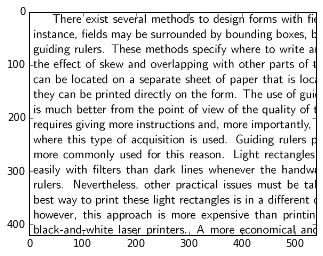

In [53]:
c = load_image('./train_cleaned/191.png')
pylab.imshow(c, cmap = cm.Greys_r)

In [ ]:
###########################
# more features(Feature Egineer): 
# we use the median value as the only feature, 
# it seems the target is dirty or not 
# only denpends on the surrounding pixels
###########################

import skimage.data
import joblib
import sklearn.ensemble

from pathlib import Path

TRAIN_DIR = Path("./train/")
TARGET_DIR = Path("./train_cleaned/")
TEST_DIR = Path("./test/")

CHUNKSIZE = 3000000
padding = 1

def get_padded(imgarray):
    padval = int(round(imgarray.flatten().mean()))
    rows, cols = imgarray.shape
    xpad = np.full((rows, padding), padval, dtype='uint8')
    ypad = np.full((padding, cols + 2 * padding), padval, dtype='uint8')
    return np.vstack((ypad, np.hstack((xpad, imgarray, xpad)), ypad))

def get_features_for_image(imgarray):
    rows, cols = imgarray.shape
    padded = get_padded(imgarray)
    features = []
    return np.vstack(tuple(
        np.vstack(tuple(
            padded[i: i + 2 * padding + 1, j: j + 2 * padding + 1].reshape((1, -1))
            for j in range(cols)
        )) for i in range(rows)
    ))

def get_features_for_path(path):
    return get_features_for_image(skimage.data.imread(str(path))/255.0)

def get_target_for_path(path):
    return skimage.data.imread(str(path)).flatten() / 255.0

def get_training_sets():
    X = list(joblib.Parallel(n_jobs=-1)(
        joblib.delayed(get_features_for_path)(i)
        for i in TRAIN_DIR.iterdir()))
    y = list(joblib.Parallel(n_jobs=-1)(
        joblib.delayed(get_target_for_path)(i)
        for i in TARGET_DIR.iterdir()))
    X = np.concatenate(X)
    y = np.concatenate(y)
    print("Finished loading")
    return X, y

def get_model(X, y):
    model = sklearn.ensemble.RandomForestRegressor(
        n_estimators=0, warm_start=True, n_jobs=-1)
    indices = list(range(0, X.shape[0], CHUNKSIZE))
    indices.append(X.shape[0])
    for i in range(len(indices) - 1):
        if not (i + 1) % 10:
            print("Fitting {} of {}".format(i + 1, len(indices) - 1))
        start, end = indices[i], indices[i + 1]
        model.set_params(n_estimators=model.get_params()["n_estimators"] + 1)
        model.fit(X[start: end], y[start: end])
    print("Finished Training")
    return model

def get_index_and_features(path):
    imgarray = skimage.data.imread(str(path))
    X = get_features_for_image(imgarray)
    index = []
    for i in range(imgarray.shape[0]):
        for j in range(imgarray.shape[1]):
            index.append("{}_{}_{}".format(path.stem, i + 1, j + 1))
    return index, X


trainX, trainy = get_training_sets()
model = get_model(trainX, trainy)

In [82]:
def denoise_image(inp):
    f = get_features_for_image(inp)
    out = model.predict(get_features_for_image(inp))
    return out.reshape(inp.shape)

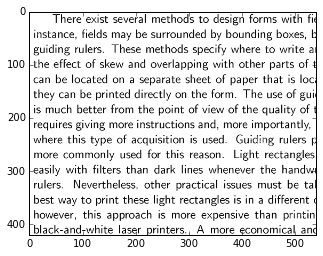

In [83]:
out = denoise_image(inp)
pylab.imshow(out, cmap = cm.Greys_r)

In [84]:
print 'Random Forest Tree:'
print measure()

Random Forest Tree:
3.png 0.0294950695134
15.png 0.0291511512061
120.png 0.028877252735
63.png 0.0276799756447
72.png 0.0261947625933
51.png 0.0261070324776
119.png 0.0258446024437
24.png 0.0258000170921
39.png 0.0257888253683
23.png 0.0257197806434
27.png 0.0256807541445
47.png 0.0251416831358
108.png 0.0249992940883
71.png 0.0247590845288
48.png 0.0242787647048
131.png 0.0234271119884
11.png 0.0234162244246
159.png 0.023308470744
107.png 0.0230787065543
147.png 0.0230196777533
12.png 0.0229297560923
60.png 0.0229107725296
132.png 0.0227067840914
59.png 0.0226794682375
35.png 0.0225060662559
36.png 0.0222971650778
143.png 0.0216228142793
95.png 0.0215734800195
96.png 0.0214593831153
2.png 0.021210693541
14.png 0.0208401867525
8.png 0.0208064402847
168.png 0.0206621684404
87.png 0.0203430440823
144.png 0.0202863240218
167.png 0.0202041571365
191.png 0.0200737580289
75.png 0.0197964202714
20.png 0.019431896752
62.png 0.0188991528814
183.png 0.0185354170917
84.png 0.0184289192972
207.png

In [85]:
def write_submission(filename):
    out = open(filename, 'w')
    out.write('id,value\n')
    for root, dirs, files in os.walk('./test'):
        for f in files:
            file_id = f.split('.')[0]
            dirty_image = load_image(os.path.join(root, f))
            clean_image = denoise_image(dirty_image)
            for (x,y), value in np.ndenumerate(clean_image):
                out.write(file_id+'_'+str(x+1)+'_'+str(y+1)+','+str(value)+'\n')
                
    out.close()

In [86]:
write_submission('rft.csv')